# Opis Problemu

## Przewidywanie Strat Ekstraktu w procesie produkcji brzeczki na Warzelni

### **1. Kontekst**

W wielu branżach produkcyjnych optymalizacja procesów produkcyjnych jest kluczowa dla utrzymania jakości produktu i zmniejszenia kosztów. Jednym z istotnych aspektów tej optymalizacji jest przewidywanie strat ekstraktu w trakcie procesu produkcyjnego.

### **2. Cel**

Celem tego projektu jest opracowanie prototypu modelu uczenia maszynowego
 w celu przewidywania **strat ekstraktu** (zmienna strata extraktu) na podstawie danych historycznych. Poprzez dokładne przewidywanie strat ekstraktu możemy podejmować proaktywne działania w celu ich minimalizacji, co prowadzi do poprawy efektywności procesu i oszczędności kosztów.

### **3. Dane**

Zbiór danych używany w tym projekcie zawiera historyczne rekordy procesów produkcyjnych na Warzelni. Dane obejmują informacje takie jak ilości surowców, ekstraktywność surowców, ilość filtracji oraz inne cenne zmienne.

### **4. Metodyka**

W celu rozwiązania tego problemu została zastosowana poniższa metoda uczenia maszynowego:

1. **Las losowy**: model regresji Lasu Losowego, aby uchwycić złożone zależności w danych i dokonywać prognoz dotyczących strat ekstraktu oraz spróbować określić istotne cechy. Wybór tego modelu zależał od ilości dostęnych danych.

### **5. Ocena modelu**

Aby ocenić wydajność modelu, użyto odpowiednich metryk oceny regresji, takich jak Średni Błąd Bezwzględny (MAE) oraz Błąd Średniokwadratowy (MSE). Dodatkowo, zastosowano metodę przeszukiwania siatki i walidację krzyżową w celu uzyskania lepszych uogulnień modelu.

W projekcie wykorzystano podstawowe zagadnienia z obszaru uczenia maszynowego

In [ ]:
# Import bibliotek
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

pd.set_option("display.max_columns", None)

### Wczytanie danych i wstępna eksploracja

In [ ]:
# Wczytanie danych
raw = pd.read_excel("/content/drive/MyDrive/Uczenie Maszynowe/Notatniki/data.xlsx")
raw.head(3)

,młyn nr,zb śruty nr,Proporcje słodu A,Słód A (gatunek I),Słód Jęczmienny A - silos,Słód Jęczmienny A - barwa,Słód A (gatunek I) ilość [kg],Słód A (gatunek I) Extrakt [%],Słód A (gatunek II),Słód Jęczmienny A - silos2,Słód Jęczmienny A - barwa2,Słód A (gatunek II) ilość [kg],Słód A (gatunek II) Extrakt [%],Pyły - Ilosć (kg),Ilość filtr,Blg - pełny kocioł,Blg - koniec gotowania,Blg - śred. w operacyjnym,WHIRPOOL Ilość brzeczki wybitej,Blg - brzeczki schłodzonej po wymienniku,LABO Blg brzeczki schłodzonej po wymienniku,Blg nieskie/wysokie,DIESEL ilość brzeczki schłodzonej,odparowanie VE,odparowanie kocioł,Brzeczka przednia Blg,strata extraktu,Nr Warki,Data
0,2.0,1.0,1.0,Baltic-A,6011,3.9,13380,78.5,NaN,NaN,NaN,0,NaN,70.0,680,13.9,14.53308,NaN,655,14.8,14.86,OK,599,2.2,4.554532,0.088055,0.125024,2547,2021-12-23 03:00:00.000
1,2.0,1.0,1.0,Baltic-A,6011,3.9,13450,78.5,NaN,NaN,NaN,0,NaN,50.0,685,13.6,14.55264,NaN,659,14.8,14.88,OK,582,2.2,7.004706,0.079720,0.156663,2562,2021-12-28 14:00:00.020
2,2.0,1.0,1.0,Baltic-A,6011,3.9,13380,78.5,NaN,NaN,NaN,0,NaN,120.0,675,13.8,14.71890,NaN,659,15.0,15.05,OK,600,2.2,6.658696,0.105531,0.109289,2563,2021-12-28 16:00:00.025


In [ ]:
# Rozmiar danych
raw.shape

(328, 29)

In [ ]:
# Wyświetl statystykę
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   młyn nr                                      324 non-null    float64       
 1   zb śruty nr                                  321 non-null    float64       
 2   Proporcje słodu A                            328 non-null    float64       
 3   Słód A (gatunek I)                           328 non-null    object        
 4   Słód Jęczmienny A - silos                    328 non-null    int64         
 5   Słód Jęczmienny A - barwa                    328 non-null    float64       
 6   Słód A (gatunek I) ilość [kg]                328 non-null    int64         
 7   Słód A (gatunek I) Extrakt [%]               328 non-null    float64       
 8   Słód A (gatunek II)                          187 non-null    object        
 9  

In [ ]:
# Wyświetlanie brakujących danych
print("Liczba brakujących danych dla każdej z cech:\n")
print(raw.isnull().sum())
print(50*"-")
print("\nLiczba brakujących danych w całym zestawie: ", raw.isnull().sum().sum())

Liczba brakujących danych dla każdej z cech:

młyn nr                                          4
zb śruty nr                                      7
Proporcje słodu A                                0
Słód A (gatunek I)                               0
Słód Jęczmienny A - silos                        0
Słód Jęczmienny A - barwa                        0
Słód A (gatunek I) ilość [kg]                    0
Słód A (gatunek I) Extrakt [%]                   0
Słód A (gatunek II)                            141
Słód Jęczmienny A - silos2                     141
Słód Jęczmienny A - barwa2                     141
Słód A (gatunek II) ilość [kg]                   0
Słód A (gatunek II) Extrakt [%]                141
Pyły - Ilosć (kg)                                9
Ilość filtr                                      0
Blg - pełny kocioł                               0
Blg - koniec gotowania                           0
Blg - śred. w operacyjnym                      187
WHIRPOOL Ilość brzeczki wybitej     

### Czyszczenie danych

In [ ]:
# Czyszczenie danych
def cleaning_data(df):
    """
    Funkcja czyszcząca dataframe. Usupełnia braki danych
    oraz usuwa zbędne kolumny.
    """
    imp1 = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    imp2 = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="brak")
    imp3 = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)

    # Transformacja danych za pomocą SimpleImputer
    raw["młyn nr"] = imp1.fit_transform(raw[["młyn nr"]])
    raw["zb śruty nr"] = imp1.fit_transform(raw[["zb śruty nr"]])
    raw["Słód A (gatunek II)"] = imp2.fit_transform(raw[["Słód A (gatunek II)"]])
    raw["Słód Jęczmienny A - silos2"] = imp3.fit_transform(raw[["Słód Jęczmienny A - silos2"]])
    raw["Słód Jęczmienny A - barwa2"] = imp3.fit_transform(raw[["Słód Jęczmienny A - barwa2"]])
    raw["Słód A (gatunek II) Extrakt [%]"] = imp3.fit_transform(raw[["Słód A (gatunek II) Extrakt [%]"]])
    raw["Blg - śred. w operacyjnym"] = imp3.fit_transform(raw[["Blg - śred. w operacyjnym"]])
    raw["Pyły - Ilosć (kg)"] = imp1.fit_transform(raw[["Pyły - Ilosć (kg)"]])

    # Usuwanie zbędnych kolumn
    raw.drop(columns=["Blg nieskie/wysokie", "Data", "Nr Warki",
                      "Słód Jęczmienny A - silos", "Słód Jęczmienny A - silos2",
                      "Słód Jęczmienny A - barwa", "Słód Jęczmienny A - barwa2",
                      "Słód A (gatunek I)", "Słód A (gatunek II)"], inplace=True)

    # W kolumnie "Brzeczka przednia Blg" brakuje danych, zostały z jakiegoś powodu pominięte podczas
    # rejestracji. Poniższy kod symuluje wartości i wstawia losowe wartości
    min_value = raw["Brzeczka przednia Blg"].min()
    max_value = raw["Brzeczka przednia Blg"].max()

    # Lambda wstawia losowe wartości z powyższego przedziału w pola np.nan
    fill_funct = lambda x: np.random.uniform(min_value, max_value) if pd.isna(x) else x
    raw["Brzeczka przednia Blg"] = raw["Brzeczka przednia Blg"].apply(fill_funct)

    return raw

In [ ]:
data = cleaning_data(raw)
data.head()

,młyn nr,zb śruty nr,Proporcje słodu A,Słód A (gatunek I) ilość [kg],Słód A (gatunek I) Extrakt [%],Słód A (gatunek II) ilość [kg],Słód A (gatunek II) Extrakt [%],Pyły - Ilosć (kg),Ilość filtr,Blg - pełny kocioł,Blg - koniec gotowania,Blg - śred. w operacyjnym,WHIRPOOL Ilość brzeczki wybitej,Blg - brzeczki schłodzonej po wymienniku,LABO Blg brzeczki schłodzonej po wymienniku,DIESEL ilość brzeczki schłodzonej,odparowanie VE,odparowanie kocioł,Brzeczka przednia Blg,strata extraktu
0,2.0,1.0,1.0,13380,78.5,0,0.0,70.0,680,13.9,14.53308,0.0,655,14.8,14.86,599,2.2,4.554532,0.088055,0.125024
1,2.0,1.0,1.0,13450,78.5,0,0.0,50.0,685,13.6,14.55264,0.0,659,14.8,14.88,582,2.2,7.004706,0.079720,0.156663
2,2.0,1.0,1.0,13380,78.5,0,0.0,120.0,675,13.8,14.71890,0.0,659,15.0,15.05,600,2.2,6.658696,0.105531,0.109289
3,2.0,1.0,1.0,13450,78.5,0,0.0,50.0,695,13.5,14.66022,0.0,654,15.0,14.99,584,2.2,8.594222,0.095991,0.144243
4,2.0,2.0,1.0,13390,78.5,0,0.0,110.0,700,13.6,14.67978,0.0,664,15.1,15.01,608,2.2,7.939559,0.111770,0.097611


In [ ]:
# Wyświetlanie statystyk oczyszczonych danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   młyn nr                                      328 non-null    float64
 1   zb śruty nr                                  328 non-null    float64
 2   Proporcje słodu A                            328 non-null    float64
 3   Słód A (gatunek I) ilość [kg]                328 non-null    int64  
 4   Słód A (gatunek I) Extrakt [%]               328 non-null    float64
 5   Słód A (gatunek II) ilość [kg]               328 non-null    int64  
 6   Słód A (gatunek II) Extrakt [%]              328 non-null    float64
 7   Pyły - Ilosć (kg)                            328 non-null    float64
 8   Ilość filtr                                  328 non-null    int64  
 9   Blg - pełny kocioł                           328 non-null    float64
 10  Bl

In [ ]:
# Wyświetl macierz korelacji, aby sprawdzić zależności między cechami
def correlation_matrix(data):
    corr_matrix = data.corr()
    plt.figure(figsize=(20,11))
    heatmap = sns.heatmap(data=corr_matrix,
                xticklabels=True,
                yticklabels=True,
                annot=True,
                annot_kws={"size": 9},
                cbar={"shrink": .4},
                fmt=".1f",
                square=True,
                linewidth=0.5,
                cmap="crest")

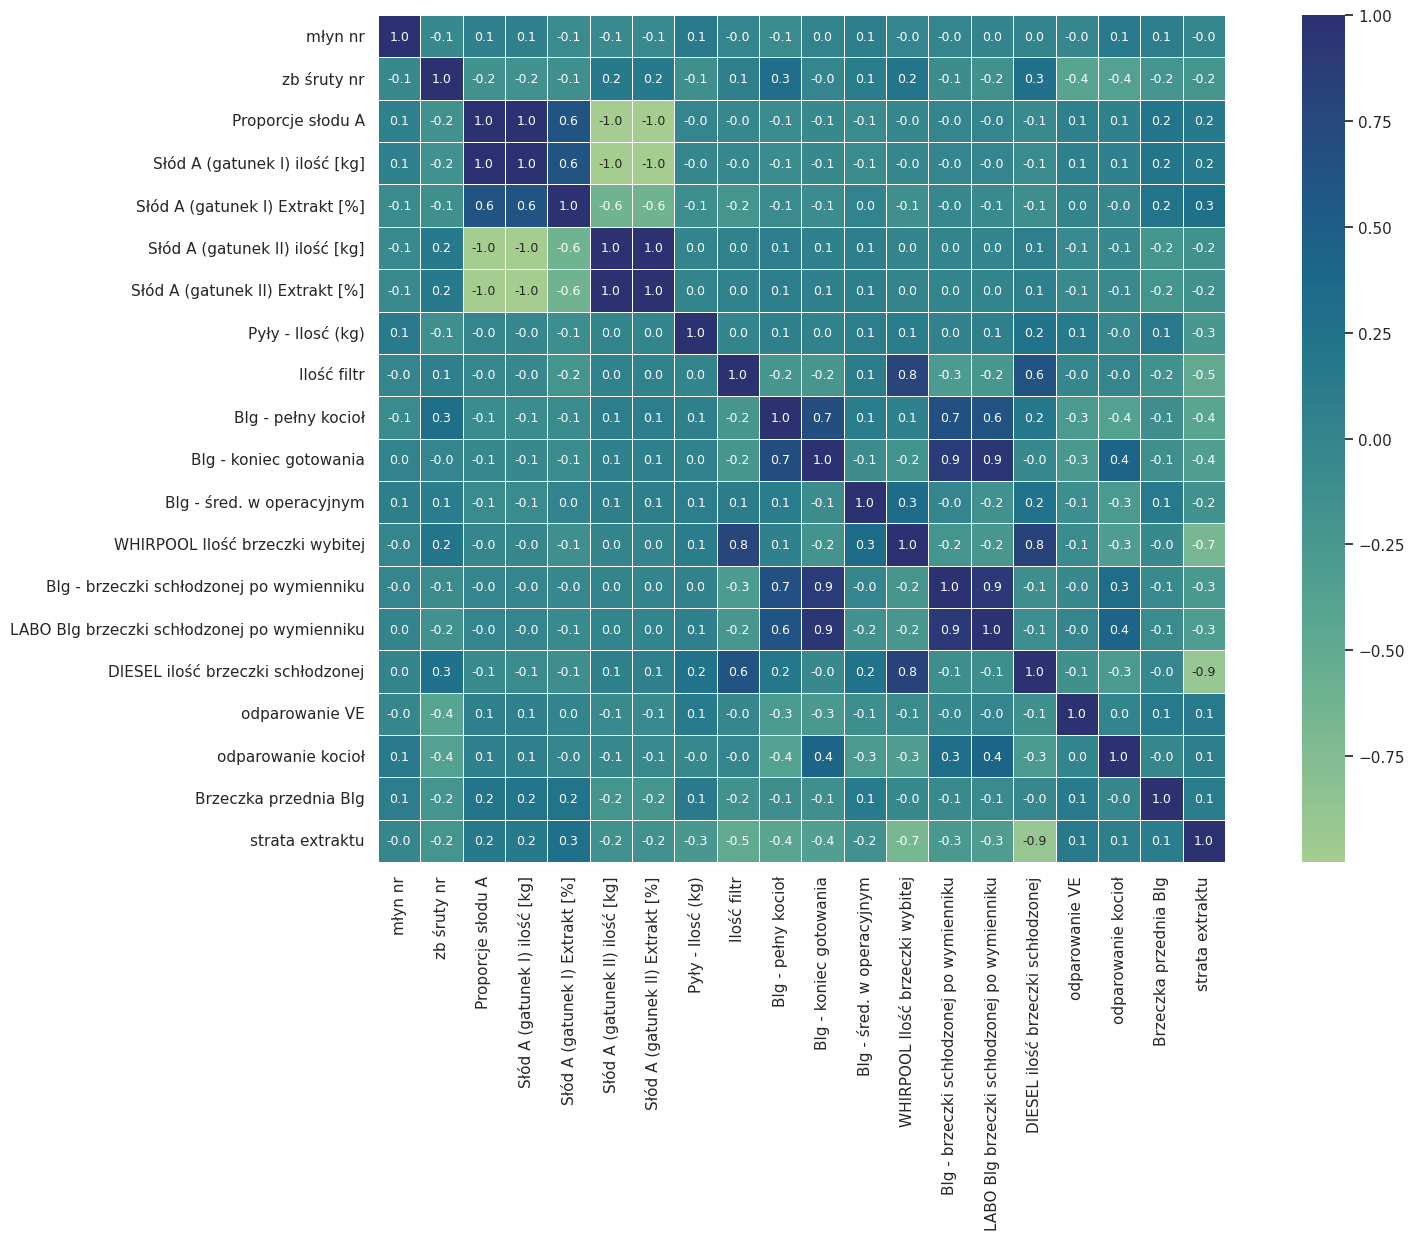

In [ ]:
correlation_matrix(data)

In [ ]:
def extract_losses_chart():
    """
    Funkcja rysuje wykres zmiennej docelowej
    """
    plt.figure(figsize=(20,6))
    plt.title("Straty ekstraktu")
    plt.xlabel("Próbka")
    plt.ylabel("Strata ekstraktu")
    plt.plot(data["strata extraktu"], label="Strata ekstraktu")
    plt.legend()
    plt.show()

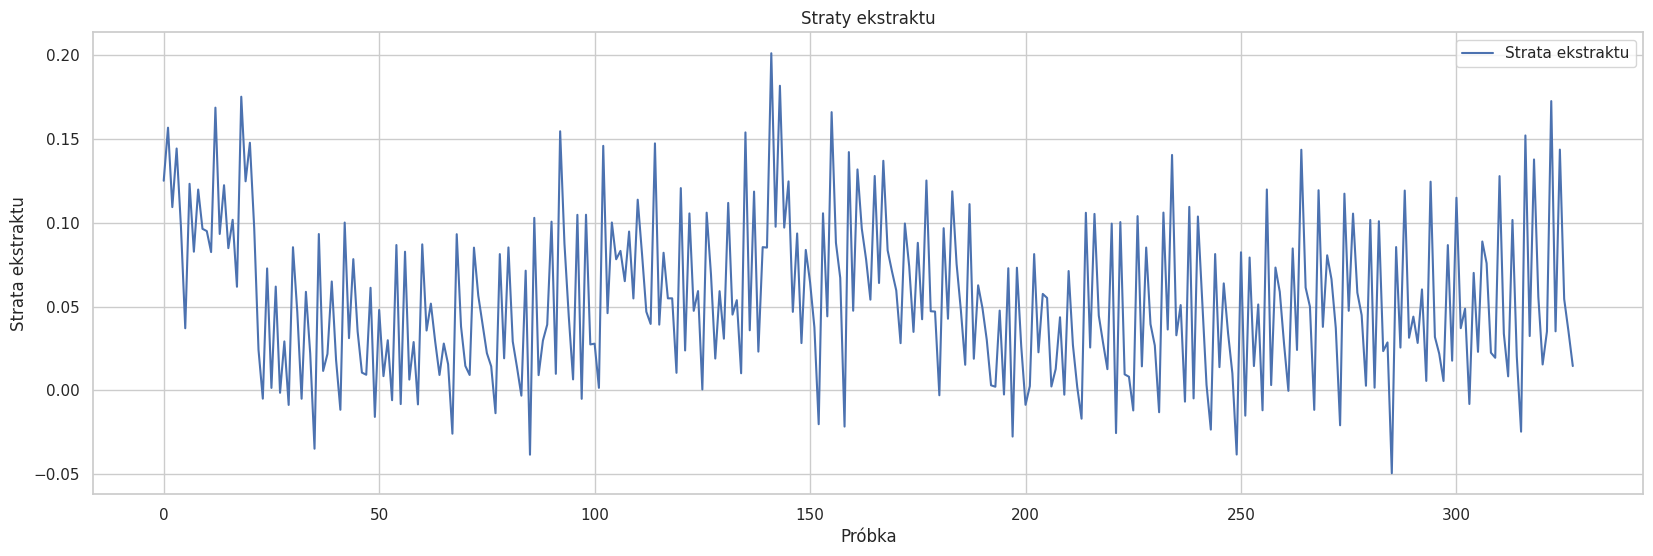

In [ ]:
extract_losses_chart()

### Normalizacja danych

In [ ]:
# Normalizacja danych
# Zastosowano normalizację danych, aby dodatkowo otrzymać
# informację o ważności cech.
skaler = StandardScaler()

# Normalizuj wszystkie cechy oprócz targetu
columns = data.columns[:-1]
data[columns] = skaler.fit_transform(data[columns])
data.head(3)

,młyn nr,zb śruty nr,Proporcje słodu A,Słód A (gatunek I) ilość [kg],Słód A (gatunek I) Extrakt [%],Słód A (gatunek II) ilość [kg],Słód A (gatunek II) Extrakt [%],Pyły - Ilosć (kg),Ilość filtr,Blg - pełny kocioł,Blg - koniec gotowania,Blg - śred. w operacyjnym,WHIRPOOL Ilość brzeczki wybitej,Blg - brzeczki schłodzonej po wymienniku,LABO Blg brzeczki schłodzonej po wymienniku,DIESEL ilość brzeczki schłodzonej,odparowanie VE,odparowanie kocioł,Brzeczka przednia Blg,strata extraktu
0,0.520882,-7.266537,1.151625,1.135748,0.9629,-1.151621,-1.151589,0.221574,-1.037850,-1.291713,-0.503721,-0.867947,-1.633881,0.014645,0.586373,-1.663329,3.041381,0.971098,1.257531,0.125024
1,0.520882,-7.266537,1.151625,1.156803,0.9629,-1.151621,-1.151589,-0.628441,-0.743475,-2.409607,-0.434767,-0.867947,-1.431439,0.014645,0.660204,-2.300724,3.041381,2.511303,0.987579,0.156663
2,0.520882,-7.266537,1.151625,1.135748,0.9629,-1.151621,-1.151589,2.346613,-1.332224,-1.664344,0.151340,-0.867947,-1.431439,0.736962,1.287770,-1.625836,3.041381,2.293797,1.823509,0.109289


### Przygotowanie zbiorów do modelu

In [ ]:
# Przypisz do zmiennej y zmienną docelową
y = data.pop("strata extraktu")
# Podziel dane na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
# Wyświetl statystyki zbiorów
print("Rozmiar zestawy treningowego:", X_train.shape)
print("Rozmiar zestawy testowego:", X_test.shape)
print("Rozmiar zestawu y_train:", y_train.shape)
print("Rozmiar zestawy y_test:", y_test.shape)

Rozmiar zestawy treningowego: (262, 19)
Rozmiar zestawy testowego: (66, 19)
Rozmiar zestawu y_train: (262,)
Rozmiar zestawy y_test: (66,)


### Trenowanie modelu

1. Przeszukiwanie siatki i walidacja krzyżowa w celu znalezienia optymalnych hiperparametrów modelu.

In [ ]:
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor()

# Utworzenie siatki i zdefiniowanie przeszukiwanych parametrów
param_grid = {"criterion": ["squared_error"],
              "max_depth": [2,4,6,8,10,15,20],
              "n_estimators": [2,4,6,8,10,15,20]}
# Utworzenie obiektu wraz z parametrami
grid_search = GridSearchCV(regressor, param_grid, scoring=None, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [2, 4, 6, 8, 10, 15, 20],
                         'n_estimators': [2, 4, 6, 8, 10, 15, 20]})

In [ ]:
# Wyświetlenie optymalnych parametrów
print("Optymalne parametry modelu to:" , grid_search.best_params_)

Optymalne parametry modelu to: {'criterion': 'squared_error', 'max_depth': 15, 'n_estimators': 20}


2. Wizualizacja ocen uzyskanych dla kombinacji wszystkich parametrów. Prezentacja różnych wyników w zależności od przetasowanych danych i użytych parametrów

In [ ]:
# Wyniki
mean_test_score = grid_search.cv_results_["mean_test_score"]
# Numery kroków
step_numbers = list(range(0, len(mean_test_score)))
# Współrzędne do narysowania najlepszego wyniku
coordinates = list(enumerate(mean_test_score, start=0))
# Pobierz indeks oraz najwyższa wartość
max_coordinates_val = max(coordinates, key=lambda x: x[1])

In [ ]:
def mean_test_scores():
    """
    Funkcja rysuje wszystkie uśrednione wyniki uzyskane
    podczas przeszukiwania siatki. Łącznie 49 kombinacji.
    """
    plt.figure(figsize=(16,4))
    plt.title("mean_test_scores")
    plt.xlabel("step")
    plt.ylabel("score")
    plt.plot(step_numbers, mean_test_score, label="Wyniki", marker="o")
    plt.annotate(f"Najlepszy wynik: {max_coordinates_val[1]:.4f}",
                 xy=(max_coordinates_val[0], max_coordinates_val[1]),
                 xytext=(max_coordinates_val[0]-0.4, max_coordinates_val[1]-0.08),
                 arrowprops=dict(facecolor ='green',
                                  shrink = 0.05),)
    plt.legend()
    plt.show()

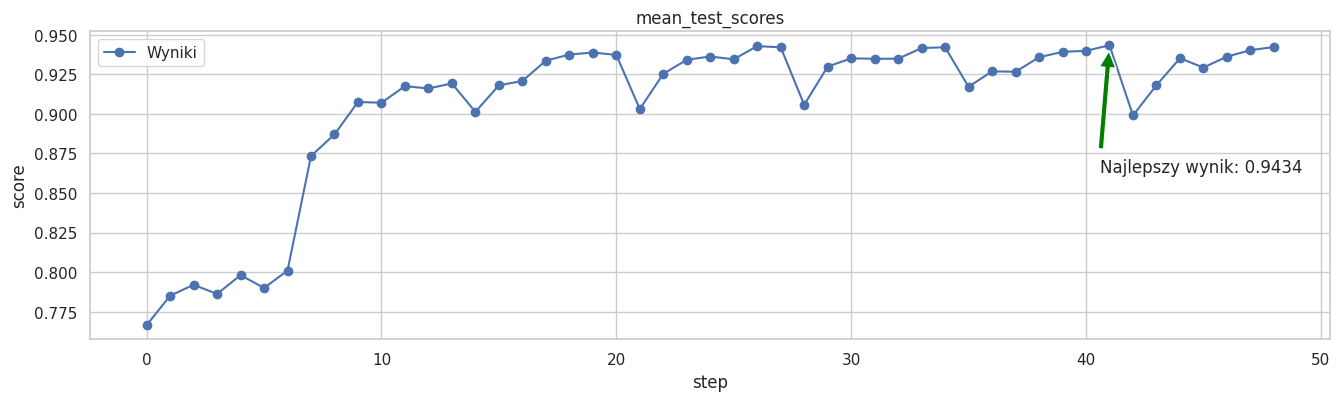

In [ ]:
mean_test_scores()

In [ ]:
# Ocena na zbiorze treningowym
print(f"Dokładność modelu na zbiorze treningowym: {grid_search.score(X_train, y_train):.4f}")
# Ocena na zbiorze treningowym
print(f"Dokładność modelu na zbiorze testowym: {grid_search.score(X_test, y_test):.4f}")

Dokładność modelu na zbiorze treningowym: 0.9899
Dokładność modelu na zbiorze testowym: 0.9202


3. Wytrenowanie modelu na podstawie znalezionych parametrów

In [ ]:
# Trenowanie modelu
rf = RandomForestRegressor(criterion="squared_error",
                           max_depth=15,
                           n_estimators=20)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=20)

In [ ]:
print("Dokładność na zbiorze treningowym", rf.score(X_train, y_train))
print("Dokładność na zbiorze testowym", rf.score(X_test, y_test))

Dokładność na zbiorze treningowym 0.9921806858355277
Dokładność na zbiorze testowym 0.9328291004731578


In [ ]:
# Model lasu losowego przechowuje wartości ważności dla każdej z cech
importances = list(rf.feature_importances_)
col_names = list(rf.feature_names_in_)

In [ ]:
def feature_importances_chart():
    """
    Funkcja rysuje wykres ważności cech
    """
    plt.figure(figsize=(10,6))
    plt.title("Wykres ważności cech")
    plt.xlabel("Ważność")
    plt.ylabel("Nazwa cechy")
    plt.barh(col_names, importances, label="Ważność cech")
    plt.legend()
    plt.show()

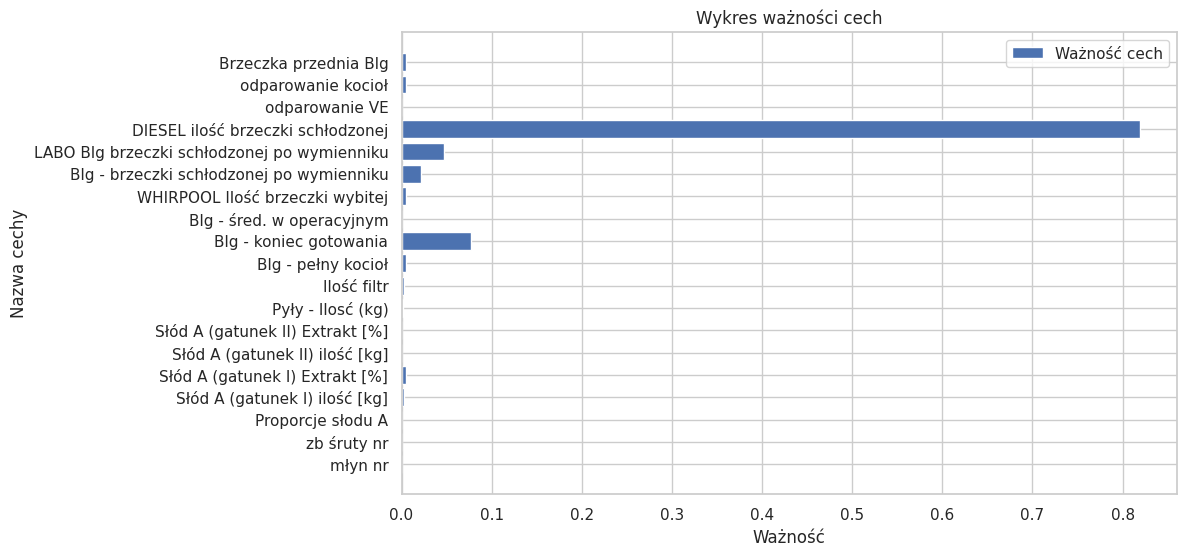

In [ ]:
feature_importances_chart()

In [ ]:
# Predykcje na zbiorze testowym
y_pred = rf.predict(X_test)
# Pobierz wartości rzeczywiste
y_true = np.array(y_test.copy())

In [ ]:
# Ocena modelu za pomocą metryk MSE, MAE
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print("MSE: ", mse)
print("MAE: ", mae)

MSE:  0.00011631784458342058
MAE:  0.007435212998302659


In [ ]:
predictions = pd.DataFrame(data={"y_true": y_true,
                                 "y_pred": y_pred})
predictions["% error"] = abs(((predictions["y_true"] - predictions["y_pred"]) / predictions["y_true"]))
predictions.head()

,y_true,y_pred,% error
0,-0.013044,-0.009377,0.281113
1,0.113717,0.111002,0.023875
2,0.082352,0.060996,0.259321
3,0.096352,0.104624,0.085849
4,0.087497,0.063906,0.269629


In [ ]:
def predictions_chart():
    """
    Funkcja rysuje wartości rzeczywiste i przewidziane
    przez model lasu losowego.
    """
    plt.figure(figsize=(14,6))
    plt.title("True vs Pred")
    plt.xlabel("Próbka")
    plt.ylabel("Strata ekstraktu")
    plt.plot(y_pred, label="Wartości przewidziane", linestyle="--")
    plt.plot(y_true, label="Wartości rzeczywiste")
    plt.legend()
    plt.show()

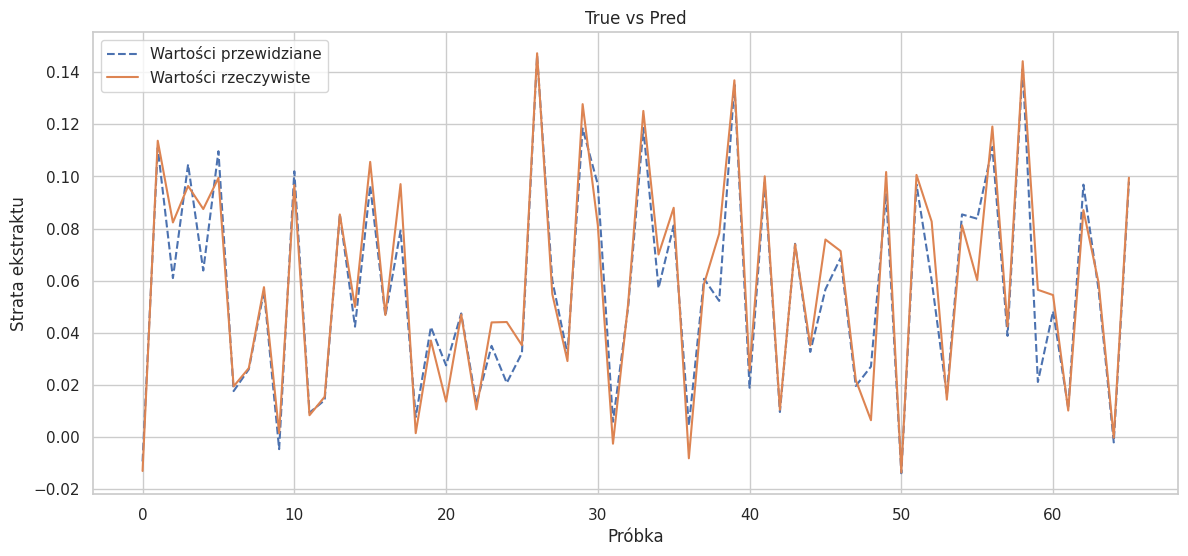

In [ ]:
predictions_chart()

### Wniosek



Jak widać, model lasu losowego został wytrenowany na danych treningowych osiągając wysoki wynik dokładności, wynoszący **0.9921**. Na zbiorze walidacyjnym osiągnięto wynik równy **0.9328**. To potwierdza, że model potrafi dobrze dopasować się do danych treningowych i radzi sobie również na nowych danych (zbiorze walidacyjnym).

Proces optymalizacji modelu obejmował wykorzystanie metody przeszukiwania siatki (grid search) i walidacji krzyżowej (cross-validation), co pozwoliło na znalezienie optymalnych parametrów modelu.

Końcowy wykres obrazuje, że model przewiduje wartości bardzo dobrze. Linia na wykresie prezentuje zbliżone wartości rzeczywiste i przewidziane, co wskazuje na wysoką jakość dopasowania modelu do danych.

Podsumowując, trenowanie modelu lasu losowego za pomocą metody przeszukiwania siatki i walidacji krzyżowej pozwoliło na osiągnięcie wysokiej jakości modelu, który dobrze radzi sobie z przewidywaniem danych. Teraz kluczowym krokiem będzie jego implementacja w praktyce oraz monitorowanie jego dokładności na rzeczywistych danych.





